# Notebook Imports and Packages

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

%matplotlib inline 

# Example 1 - A Simple Cost Function
$f(x) = x^2 + x + 1$

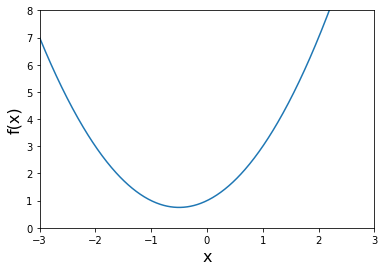

In [74]:
def f(x):
    return x**2 + x + 1

#making data
x_1 = np.linspace(start=-3, stop=3, num=500) #creates a linear space equally distributed of 500 values

#plotting data
plt.plot(x_1, f(x_1))
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.show()


## Slope and Derivates

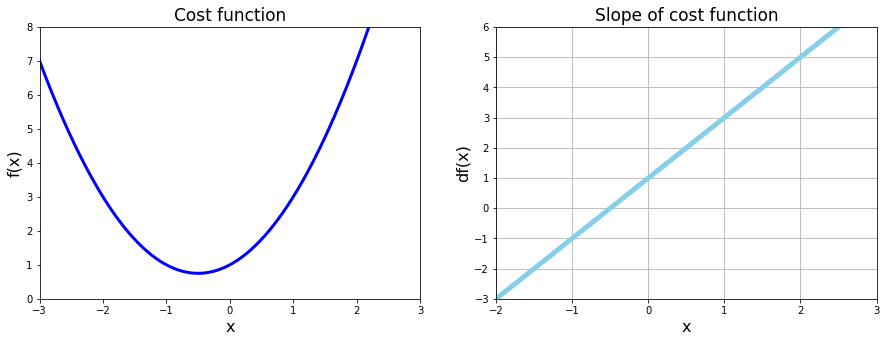

In [75]:
def df(x):
    return 2 * x + 1 #a derivative of a function gives us the rate of change

#plot function and derivative
plt.figure(figsize=[15, 5])

#first chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#second chart: derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()






## Gradient Descent

In [76]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(0, 500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
        
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if (step_size < precision):
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope value is: ', df(new_x))
print('f(x) value is: ', f(new_x))

Local minimum occurs at:  -0.49962781616118024
Slope value is:  0.0007443676776395236
f(x) value is:  0.7500001385208099


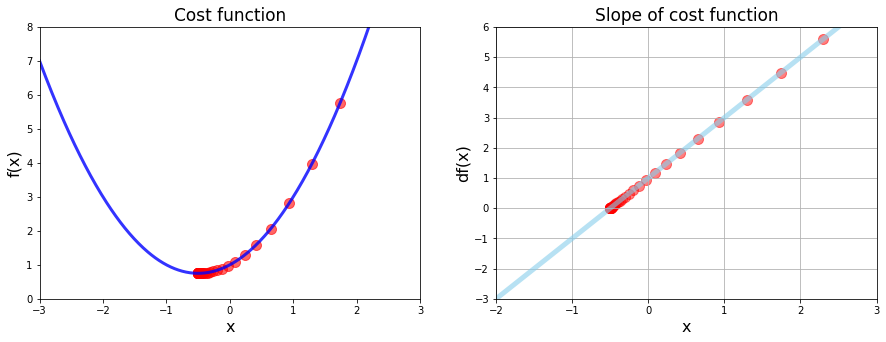

In [77]:
plt.figure(figsize=[15, 5])

#first chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)
values = np.array(x_list)

plt.scatter(x_list, f(values), color='red', alpha=0.6, s=100)

#second chart: derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial guess & advanced functions
## $$g(x) = x^4 - 4x^2 + 5$$

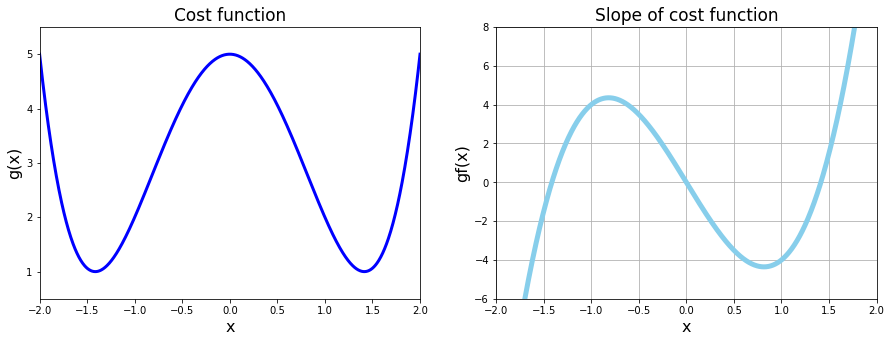

In [78]:
#make data
x_2 = np.linspace(start=-2, stop=2, num=1000)
def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4 * x**3 - 8 * x

#plot function and derivative
plt.figure(figsize=[15, 5])

#first chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#second chart: derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('gf(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()



## Gradient Descent as function

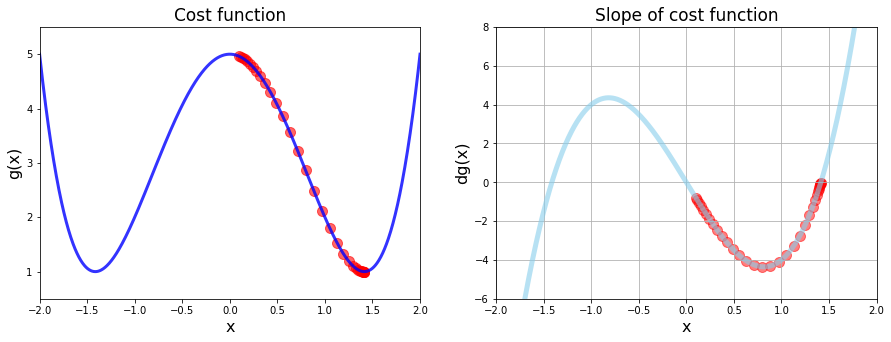

In [79]:
def gradient_descent(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    
    new_x = initial_guess
    

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(0, max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if (step_size < precision):
            break
    
    return new_x, x_list, slope_list

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

plt.figure(figsize=[15, 5])

#first chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(list_x)

plt.scatter(list_x, g(values), color='red', alpha=0.6, s=100)

#second chart: derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


# Example 3 - Divergence Overflow
## $$h(x) = x^5 - 2x^4 + 2$$

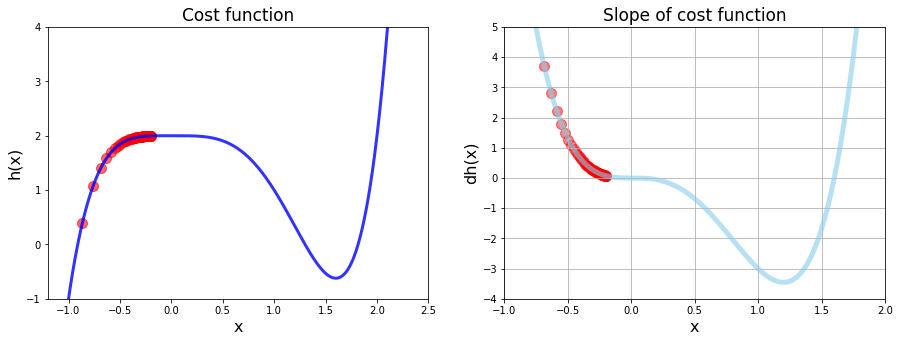

Local min at:  -2071072.4470816324
Cost at:  -3.810455326061589e+31


In [80]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)
def h(x):
    return x**5 - 2 * x**4 + 2

def dh(x):
    return 5 * x**4 - 8 * x**3

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=70)

plt.figure(figsize=[15, 5])

#first chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
values = np.array(list_x)
plt.scatter(list_x, h(values), color='red', alpha=0.6, s=100)

#second chart: derivative
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.title('Slope of cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min at: ', local_min)
print('Cost at: ', h(local_min))

## Example 4 - Data Visualization 3D charts

$$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$


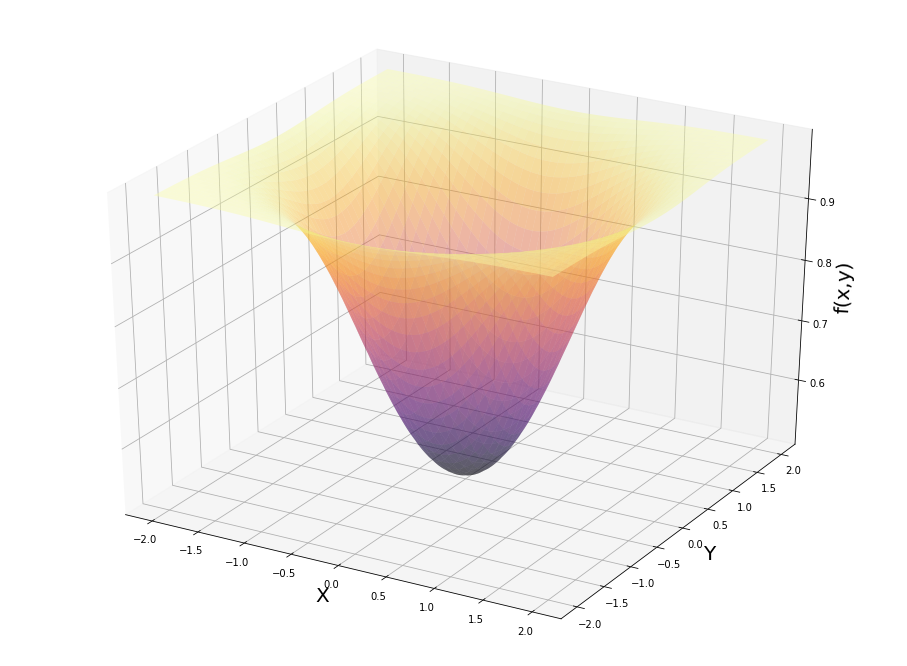

In [83]:
def f(x, y):
    r = 3** (-x**2 - y**2)
    return 1 / (r + 1)

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)
plt.show()
